# Training LayoutLM-v3 model on Wild Receipt Dataset

Dataset:

The WildReceipt dataset consists of 1740 receipt images, contains 25 key information categories, a total of about 69000 text boxes, and is about 2 times larger than the existing public datasets. 1268 and 472 images  are used for training and test respectively.

For more information on the dataset, do refer 
Hongbin Sun, Zhanghui Kuang, Xiaoyu Yue, Chenhao Lin, and Wayne Zhang. 2021. Spatial Dual-Modality Graph Reasoning for Key Information Extraction. arXiv. DOI:https://doi.org/10.48550/ARXIV.2103.14470

This Notebook is inspired from Mr.Niels Rogge [notebook](https://github.com/NielsRogge/Transformers-Tutorials/blob/master/LayoutLMv3/Fine_tune_LayoutLMv3_on_FUNSD_(HuggingFace_Trainer).ipynb) for training LayoutLMv3 model from scratch.


This notebook is divided into three part namely:

1. Training
2. Testing
3. Inference on Gradio

Gradio Demo of LayoutLM v3 is  deployed at Huggingface spaces and is  available from the [notebook](https://huggingface.co/spaces/Theivaprakasham/wildreceipt): https://huggingface.co/spaces/Theivaprakasham/wildreceipt


Please do support with a like if you enjoy reading through the notebook or the demo.

Thank you Folks.

In [1]:
!nvidia-smi

Sat Jun 11 07:14:00 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    25W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              8
On-line CPU(s) list: 0-7
Thread(s) per core:  2
Core(s) per socket:  4
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               85
Model name:          Intel(R) Xeon(R) CPU @ 2.00GHz
Stepping:            3
CPU MHz:             2000.180
BogoMIPS:            4000.36
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            1024K
L3 cache:            39424K
NUMA node0 CPU(s):   0-7
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_si

In [3]:
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install -q datasets seqeval
!pip install gradio
!sudo apt install tesseract-ocr
!pip install pytesseract

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.6 MB 14.3 MB/s 
     |████████████████████████████████| 86 kB 6.4 MB/s 
     |████████████████████████████████| 596 kB 46.0 MB/s 
     |████████████████████████████████| 346 kB 14.9 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 212 kB 87.9 MB/s 
     |████████████████████████████████| 140 kB 88.7 MB/s 
     |████████████████████████████████| 86 kB 7.0 MB/s 
     |████████████████████████████████| 1.1 MB 80.8 MB/s 
     |████████████████████████████████| 127 kB 63.3 MB/s 
     |████████████████████████████████| 94 kB 4.6 MB/s 
     |████████████████████████████████| 144 kB 83.0 MB/s 
     |████████████████████████████████| 271 kB 85.0 MB/s 
     |████████████████████████████████| 112 kB 90.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account 

In [4]:
!pip freeze

absl-py==1.0.0
aiohttp==3.8.1
aiosignal==1.2.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.2.0
analytics-python==1.4.0
anyio==3.6.1
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.12.1
asgiref==3.5.2
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
asynctest==0.13.0
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.4.0
audioread==2.1.9
autograd==1.4
Babel==2.10.1
backcall==0.2.0
backoff==1.10.0
bcrypt==3.2.2
beautifulsoup4==4.6.3
bleach==5.0.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.4
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2022.5.18.1
cffi==1.15.0
cftime==1.6.0
chardet==3.0.4
charset-normalizer==2.0.12
click==7.1.2
cloudpickle==1.3.0
cmake==3.22.4
cmdstanpy==0.9.5
colorcet==3.0.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.4.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cryptography==37.0.2
cufflinks==0.17.3
cupy-cuda111==9.4.0
cvxopt==1.2.

In [5]:
!huggingface-cli login


        _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
        _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
        _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
        _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
        _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

        To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
        (Deprecated, will be removed in v0.3.0) To login with username and password instead, interrupt with Ctrl+C.
        
Token: 
Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machi

In [6]:
!git config --global user.email "htheivaprakasham@gmail.com"
!git config --global user.name "theivaprakasham"

In [ ]:
### Please Restart the RUNTIME to avoid Import Errors.

In [1]:
from datasets import load_dataset 

dataset = load_dataset("Theivaprakasham/wildreceipt")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


Generating test split: 0 examples [00:00, ? examples/s]

Dataset wild_receipt downloaded and prepared to /root/.cache/huggingface/datasets/Theivaprakasham___wild_receipt/WildReceipt/1.0.0/643cda6d4cd0ff2e8d7ee57e4872c509b29060f1df957b5a59e66d9940b9594e. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'words', 'bboxes', 'ner_tags', 'image_path'],
        num_rows: 1267
    })
    test: Dataset({
        features: ['id', 'words', 'bboxes', 'ner_tags', 'image_path'],
        num_rows: 472
    })
})

In [3]:
dataset["train"].features

{'bboxes': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
 'id': Value(dtype='string', id=None),
 'image_path': Value(dtype='string', id=None),
 'ner_tags': Sequence(feature=ClassLabel(num_classes=26, names=['Ignore', 'Store_name_value', 'Store_name_key', 'Store_addr_value', 'Store_addr_key', 'Tel_value', 'Tel_key', 'Date_value', 'Date_key', 'Time_value', 'Time_key', 'Prod_item_value', 'Prod_item_key', 'Prod_quantity_value', 'Prod_quantity_key', 'Prod_price_value', 'Prod_price_key', 'Subtotal_value', 'Subtotal_key', 'Tax_value', 'Tax_key', 'Tips_value', 'Tips_key', 'Total_value', 'Total_key', 'Others'], id=None), length=-1, id=None),
 'words': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}

In [4]:
example = dataset["train"][0]
example["image_path"]

'/root/.cache/huggingface/datasets/downloads/extracted/45def005658ace1716e7afacdc601a5bf898a841c6a162db275b9a4fe284c526/wildreceipt/image_files/Image_16/11/d5de7f2a20751e50b84c747c17a24cd98bed3554.jpeg'

In [5]:
words, bboxes, ner_tags = example["words"], example["bboxes"], example["ner_tags"]
print(words)
print(bboxes)
print(ner_tags)

['SAFEWAY', 'TM', 'ATOREMGRTOMMILAZZO', '703-777-5833', 'THANKYOUFORSHOPPINGWITHUS!', 'GROCERY', 'BCCHOCCUPCAKES', 'ACNSPRYFRTSHAPE', 'Regprice', 'Cardsavings', 'MfrCpn', 'MultipliedCpn', 'DULCEDELECHECHE', 'Regprice', 'CardSavings', 'MfrCpn', 'MuitipliedCpn', 'MULTIGRAINCHEERIO', 'RegPrice', 'CardSavings', 'MfrCpn', 'MuitieliedCpn', 'PROGRESSOR&HSTK', 'RegPrice', 'CardSavings', 'REFRIG/FROZEN', '3.99', '.49', '3.79', '1.80-', '.75-', '.75-', '1.99', '4.19', '1.20-', '.50-', '.50-', '1.50', '3.99', '1.49-', '.50-', '.50-', '2.00', '2.69', '.69-', '1OIY', 'PLSBRYBSCTSANDWI', 'TOTINOSPZASTOFFE', 'RegPrice', '', '', '3.50', '3.49', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
[[343, 86, 585, 158], [655, 163, 671, 175], [334, 166, 520, 199], [566, 185, 675, 213], [360, 191, 635, 235], [452, 295, 525, 322], [296, 328, 458, 360], [293, 350, 477, 388], [291, 373, 371, 402], [289, 398, 411, 430], [286, 422, 358, 448], [284, 446, 428, 481], [283, 470, 468, 509], [280, 494, 363, 520], [278, 519, 402, 551]

In [6]:
from transformers import AutoProcessor

# we'll use the Auto API here - it will load LayoutLMv3Processor behind the scenes,
# based on the checkpoint we provide from the hub
processor = AutoProcessor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)

Downloading:   0%|          | 0.00/275 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/856 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

In [7]:
from datasets.features import ClassLabel

features = dataset["train"].features
column_names = dataset["train"].column_names
image_column_name = "image_path"
text_column_name = "words"
boxes_column_name = "bboxes"
label_column_name = "ner_tags"

# In the event the labels are not a `Sequence[ClassLabel]`, we will need to go through the dataset to get the
# unique labels.
def get_label_list(labels):
    unique_labels = set()
    for label in labels:
        unique_labels = unique_labels | set(label)
    label_list = list(unique_labels)
    label_list.sort()
    return label_list

if isinstance(features[label_column_name].feature, ClassLabel):
    label_list = features[label_column_name].feature.names
    # No need to convert the labels since they are already ints.
    id2label = {k: v for k,v in enumerate(label_list)}
    label2id = {v: k for k,v in enumerate(label_list)}
else:
    label_list = get_label_list(dataset["train"][label_column_name])
    id2label = {k: v for k,v in enumerate(label_list)}
    label2id = {v: k for k,v in enumerate(label_list)}
num_labels = len(label_list)

In [8]:
print(label_list)

['Ignore', 'Store_name_value', 'Store_name_key', 'Store_addr_value', 'Store_addr_key', 'Tel_value', 'Tel_key', 'Date_value', 'Date_key', 'Time_value', 'Time_key', 'Prod_item_value', 'Prod_item_key', 'Prod_quantity_value', 'Prod_quantity_key', 'Prod_price_value', 'Prod_price_key', 'Subtotal_value', 'Subtotal_key', 'Tax_value', 'Tax_key', 'Tips_value', 'Tips_key', 'Total_value', 'Total_key', 'Others']


In [9]:
print(id2label)

{0: 'Ignore', 1: 'Store_name_value', 2: 'Store_name_key', 3: 'Store_addr_value', 4: 'Store_addr_key', 5: 'Tel_value', 6: 'Tel_key', 7: 'Date_value', 8: 'Date_key', 9: 'Time_value', 10: 'Time_key', 11: 'Prod_item_value', 12: 'Prod_item_key', 13: 'Prod_quantity_value', 14: 'Prod_quantity_key', 15: 'Prod_price_value', 16: 'Prod_price_key', 17: 'Subtotal_value', 18: 'Subtotal_key', 19: 'Tax_value', 20: 'Tax_key', 21: 'Tips_value', 22: 'Tips_key', 23: 'Total_value', 24: 'Total_key', 25: 'Others'}


In [10]:
from PIL import Image

In [11]:
def prepare_examples(examples):
  images = [Image.open(path).convert("RGB") for path in examples['image_path']] #Image.open(examples[image_column_name])
  words = examples[text_column_name]
  boxes = examples[boxes_column_name]
  word_labels = examples[label_column_name]

  encoding = processor(images, words, boxes=boxes, word_labels=word_labels,
                       truncation=True, padding="max_length")

  return encoding

In [12]:
from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D

# we need to define custom features for `set_format` (used later on) to work properly
features = Features({
    'pixel_values': Array3D(dtype="float32", shape=(3, 224, 224)),
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'attention_mask': Sequence(Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'labels': Sequence(ClassLabel(names=label_list)),
})

train_dataset = dataset["train"].map(
    prepare_examples,
    batched=True,
    remove_columns=column_names,
    features=features,
)
eval_dataset = dataset["test"].map(
    prepare_examples,
    batched=True,
    remove_columns=column_names,
    features=features,
)

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [13]:
train_dataset

Dataset({
    features: ['pixel_values', 'input_ids', 'attention_mask', 'bbox', 'labels'],
    num_rows: 1267
})

In [14]:
example = train_dataset[0]
processor.tokenizer.decode(example["input_ids"])

'<s> SAFEWAY TM ATOREMGRTOMMILAZZO 703-777-5833 THANKYOUFORSHOPPINGWITHUS! GROCERY BCCHOCCUPCAKES ACNSPRYFRTSHAPE Regprice Cardsavings MfrCpn MultipliedCpn DULCEDELECHECHE Regprice CardSavings MfrCpn MuitipliedCpn MULTIGRAINCHEERIO RegPrice CardSavings MfrCpn MuitieliedCpn PROGRESSOR&HSTK RegPrice CardSavings REFRIG/FROZEN 3.99.49 3.79 1.80-.75-.75- 1.99 4.19 1.20-.50-.50- 1.50 3.99 1.49-.50-.50- 2.00 2.69.69- 1OIY PLSBRYBSCTSANDWI TOTINOSPZASTOFFE RegPrice 3.50 3.49 B B B B B B B</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><

In [15]:
train_dataset.set_format("torch")

In [16]:
import torch

example = train_dataset[0]
for k,v in example.items():
    print(k,v.shape)

pixel_values torch.Size([3, 224, 224])
input_ids torch.Size([512])
attention_mask torch.Size([512])
bbox torch.Size([512, 4])
labels torch.Size([512])


In [17]:
eval_dataset

Dataset({
    features: ['pixel_values', 'input_ids', 'attention_mask', 'bbox', 'labels'],
    num_rows: 472
})

In [18]:
processor.tokenizer.decode(eval_dataset[0]["input_ids"])

'<s> CHOEUN KOREANRESTAURANT 2621ORANGETHORPEAVE,FULLERTON. (714)879-3574 THANKYOU!! DATE 12/30/2016FRI 19:19 BIBIM.OCTOPUT1 S-FOODP.CAKT1 PORKDUMPLINT1 LABEEFRIBT1 $13.99 $14.99 $8.99 ￥17.99 4.00xITEMS SUBTOTAL TAX1 TOTAL $55.96 $4.48 $60.44 TIME</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad

In [19]:
for id, label in zip(train_dataset[0]["input_ids"], train_dataset[0]["labels"]):
  print(processor.tokenizer.decode([id]), label.item())

<s> -100
 SAF 1
EW -100
AY -100
 TM 25
 AT 25
OR -100
EM -100
GR -100
T -100
OM -100
M -100
IL -100
AZ -100
Z -100
O -100
 7 5
03 -100
- -100
777 -100
- -100
58 -100
33 -100
 THANK 25
YOU -100
FOR -100
SH -100
OP -100
P -100
ING -100
W -100
ITH -100
US -100
! -100
 GR 25
OC -100
ERY -100
 BC 11
CHO -100
CC -100
U -100
PC -100
AK -100
ES -100
 AC 11
N -100
SP -100
RY -100
FR -100
TS -100
H -100
APE -100
 Reg 25
price -100
 Cards 25
av -100
ings -100
 M 25
fr -100
C -100
pn -100
 Multi 25
pl -100
ied -100
C -100
pn -100
 DU 11
LC -100
ED -100
E -100
LE -100
CH -100
EC -100
HE -100
 Reg 25
price -100
 Card 25
Sav -100
ings -100
 M 25
fr -100
C -100
pn -100
 M 25
uit -100
ipl -100
ied -100
C -100
pn -100
 M 11
ULT -100
IG -100
RA -100
IN -100
CH -100
E -100
ER -100
IO -100
 Reg 25
Price -100
 Card 25
Sav -100
ings -100
 M 25
fr -100
C -100
pn -100
 M 25
uit -100
iel -100
ied -100
C -100
pn -100
 PROG 11
R -100
ESS -100
OR -100
& -100
H -100
ST -100
K -100
 Reg 25
Price -100
 Card 25
Sav -1

In [20]:
from datasets import load_metric

metric = load_metric("seqeval")

In [21]:
import numpy as np

return_entity_level_metrics = False

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    if return_entity_level_metrics:
        # Unpack nested dictionaries
        final_results = {}
        for key, value in results.items():
            if isinstance(value, dict):
                for n, v in value.items():
                    final_results[f"{key}_{n}"] = v
            else:
                final_results[key] = value
        return final_results
    else:
        return {
            "precision": results["overall_precision"],
            "recall": results["overall_recall"],
            "f1": results["overall_f1"],
            "accuracy": results["overall_accuracy"],
        }

In [22]:
from transformers import LayoutLMv3ForTokenClassification

model = LayoutLMv3ForTokenClassification.from_pretrained("microsoft/layoutlmv3-base",
                                                         id2label=id2label,
                                                         label2id=label2id)

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of LayoutLMv3ForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="layoutlmv3-finetuned-wildreceipt",
                                  max_steps=4000,
                                  per_device_train_batch_size=4,
                                  per_device_eval_batch_size=4,
                                  learning_rate=1e-5,
                                  evaluation_strategy="steps",
                                  eval_steps=100,
                                  load_best_model_at_end=True,
                                  metric_for_best_model="f1",
                                  push_to_hub=True,
                                  push_to_hub_model_id=f"layoutlmv3-finetuned-wildreceipt",
                                  )

/usr/local/lib/python3.7/dist-packages/transformers/training_args.py:1164: FutureWarning: `--push_to_hub_model_id` is deprecated and will be removed in version 5 of 🤗 Transformers. Use `--hub_model_id` instead and pass the full repo name to this argument (in this case Theivaprakasham/layoutlmv3-finetuned-wildreceipt).
  FutureWarning,


In [28]:
from transformers.data.data_collator import default_data_collator

# Initialize our Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=processor,
    data_collator=default_data_collator,
    compute_metrics=compute_metrics,
)

Cloning https://huggingface.co/Theivaprakasham/layoutlmv3-finetuned-wildreceipt into local empty directory.
max_steps is given, it will override any value given in num_train_epochs


In [29]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 1267
  Num Epochs = 13
  Instantaneous batch size per device = 4
  Total train batch size (w. parallel, distributed & accumulation) = 4
  Gradient Accumulation steps = 1
  Total optimization steps = 4000
/usr/local/lib/python3.7/dist-packages/transformers/modeling_utils.py:811: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is deprecated and will be removed in v5 of Transformers.", FutureWarning


Step,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
100,No log,1.314327,0.670917,0.267923,0.382929,0.669957
200,No log,0.881435,0.647846,0.519472,0.576600,0.778600
300,No log,0.656762,0.720483,0.649099,0.682930,0.830317
400,No log,0.561829,0.754404,0.707169,0.730023,0.851925
500,1.028400,0.500308,0.780190,0.756571,0.768199,0.868707
600,1.028400,0.445404,0.794080,0.767855,0.780747,0.874794
700,1.028400,0.431372,0.814161,0.792762,0.803319,0.885160
800,1.028400,0.387011,0.817197,0.820008,0.818600,0.895305
900,1.028400,0.362878,0.828836,0.836934,0.832865,0.902490
1000,0.416700,0.353678,0.853970,0.820008,0.836644,0.905232


***** Running Evaluation *****
  Num examples = 472
  Batch size = 4
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Store_name_value seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Store_addr_value seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Tel_value seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Others seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Date_key seems not to be NE tag.
  warnings.warn('{} seems not to be NE ta

TrainOutput(global_step=4000, training_loss=0.3106026840209961, metrics={'train_runtime': 2065.4915, 'train_samples_per_second': 7.746, 'train_steps_per_second': 1.937, 'total_flos': 4244246855245824.0, 'train_loss': 0.3106026840209961, 'epoch': 12.62})

In [30]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 472
  Batch size = 4
/usr/local/lib/python3.7/dist-packages/transformers/modeling_utils.py:811: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is deprecated and will be removed in v5 of Transformers.", FutureWarning


/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Store_name_value seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Store_addr_value seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Tel_value seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Others seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Date_key seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/met

{'epoch': 12.62,
 'eval_accuracy': 0.9249204782274871,
 'eval_f1': 0.8785380599065679,
 'eval_loss': 0.31080925464630127,
 'eval_precision': 0.877212237618329,
 'eval_recall': 0.8798678959680749,
 'eval_runtime': 21.0985,
 'eval_samples_per_second': 22.371,
 'eval_steps_per_second': 5.593}

In [31]:
trainer.push_to_hub()

Saving model checkpoint to layoutlmv3-finetuned-wildreceipt
Configuration saved in layoutlmv3-finetuned-wildreceipt/config.json
Model weights saved in layoutlmv3-finetuned-wildreceipt/pytorch_model.bin
Feature extractor saved in layoutlmv3-finetuned-wildreceipt/preprocessor_config.json
tokenizer config file saved in layoutlmv3-finetuned-wildreceipt/tokenizer_config.json
Special tokens file saved in layoutlmv3-finetuned-wildreceipt/special_tokens_map.json
Several commits (2) will be pushed upstream.
The progress bars may be unreliable.


Upload file pytorch_model.bin:   0%|          | 3.34k/480M [00:00<?, ?B/s]

Upload file runs/Jun11_07-20-51_4a2450e39997/events.out.tfevents.1654934171.4a2450e39997.666.2: 100%|#########…

Upload file runs/Jun11_07-20-51_4a2450e39997/events.out.tfevents.1654932084.4a2450e39997.666.0:  13%|#3       …

remote: Enforcing permissions...        
remote: Allowed refs: all        
To https://huggingface.co/Theivaprakasham/layoutlmv3-finetuned-wildreceipt
   24c6330..8723476  main -> main

remote: Enforcing permissions...        
remote: Allowed refs: all        
To https://huggingface.co/Theivaprakasham/layoutlmv3-finetuned-wildreceipt
   8723476..5100120  main -> main



'https://huggingface.co/Theivaprakasham/layoutlmv3-finetuned-wildreceipt/commit/8723476cea04dc6a0ce7bfeac88df2e3c7959a0e'

# Inference

In [32]:
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained("Theivaprakasham/layoutlmv3-finetuned-wildreceipt")

https://huggingface.co/Theivaprakasham/layoutlmv3-finetuned-wildreceipt/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp225qty89


Downloading:   0%|          | 0.00/2.27k [00:00<?, ?B/s]

storing https://huggingface.co/Theivaprakasham/layoutlmv3-finetuned-wildreceipt/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/7930ff15232d965c1d3d4d5cc0ffc0079b30e29afbc13a3c9dcc837f1a74392f.177f8213f90439b79bc7587ae87ad84fc3c9dd8ec5b84f131bc33020dfb01170
creating metadata file for /root/.cache/huggingface/transformers/7930ff15232d965c1d3d4d5cc0ffc0079b30e29afbc13a3c9dcc837f1a74392f.177f8213f90439b79bc7587ae87ad84fc3c9dd8ec5b84f131bc33020dfb01170
loading configuration file https://huggingface.co/Theivaprakasham/layoutlmv3-finetuned-wildreceipt/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/7930ff15232d965c1d3d4d5cc0ffc0079b30e29afbc13a3c9dcc837f1a74392f.177f8213f90439b79bc7587ae87ad84fc3c9dd8ec5b84f131bc33020dfb01170
Model config LayoutLMv3Config {
  "_name_or_path": "Theivaprakasham/layoutlmv3-finetuned-wildreceipt",
  "architectures": [
    "LayoutLMv3ForTokenClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_

Downloading:   0%|          | 0.00/480M [00:00<?, ?B/s]

storing https://huggingface.co/Theivaprakasham/layoutlmv3-finetuned-wildreceipt/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/b5817f36062e4ae4bf1a482a672cca120bd104d803505feb8824b68c1b7fa398.415d2c7ca24f83c2b5ca6b215d276f1d068500610e84fecbe3810343c5d10f10
creating metadata file for /root/.cache/huggingface/transformers/b5817f36062e4ae4bf1a482a672cca120bd104d803505feb8824b68c1b7fa398.415d2c7ca24f83c2b5ca6b215d276f1d068500610e84fecbe3810343c5d10f10
loading weights file https://huggingface.co/Theivaprakasham/layoutlmv3-finetuned-wildreceipt/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/b5817f36062e4ae4bf1a482a672cca120bd104d803505feb8824b68c1b7fa398.415d2c7ca24f83c2b5ca6b215d276f1d068500610e84fecbe3810343c5d10f10
All model checkpoint weights were used when initializing LayoutLMv3ForTokenClassification.

All the weights of LayoutLMv3ForTokenClassification were initialized from the model checkpoint at Theivaprakasham/la

In [33]:
example = dataset["test"][0]
print(example.keys())

image = Image.open(example["image_path"])
words = example["words"]
boxes = example["bboxes"]
word_labels = example["ner_tags"]

encoding = processor(image, words, boxes=boxes, word_labels=word_labels, return_tensors="pt")
for k,v in encoding.items():
  print(k,v.shape)

dict_keys(['id', 'words', 'bboxes', 'ner_tags', 'image_path'])
input_ids torch.Size([1, 126])
attention_mask torch.Size([1, 126])
bbox torch.Size([1, 126, 4])
labels torch.Size([1, 126])
pixel_values torch.Size([1, 3, 224, 224])


In [34]:
with torch.no_grad():
  outputs = model(**encoding)

logits = outputs.logits
print(logits.shape)

predictions = logits.argmax(-1).squeeze().tolist()
print(predictions)

/usr/local/lib/python3.7/dist-packages/transformers/modeling_utils.py:811: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is deprecated and will be removed in v5 of Transformers.", FutureWarning


torch.Size([1, 126, 26])
[25, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 25, 25, 25, 8, 8, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 25, 25, 25, 25, 25, 25, 18, 18, 24, 20, 20, 20, 24, 17, 17, 17, 17, 19, 19, 19, 19, 23, 23, 23, 23, 10, 25]


In [35]:
labels = encoding.labels.squeeze().tolist()
print(labels)

[-100, 1, -100, -100, 1, -100, -100, -100, -100, -100, -100, 3, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, 5, -100, -100, -100, -100, -100, -100, -100, 25, -100, -100, 8, -100, 7, -100, -100, -100, -100, -100, -100, 9, -100, -100, 11, -100, -100, -100, -100, -100, -100, -100, -100, 11, -100, -100, -100, -100, -100, -100, -100, -100, 11, -100, -100, -100, -100, -100, -100, 11, -100, -100, -100, -100, -100, -100, 15, -100, -100, -100, 15, -100, -100, -100, 15, -100, -100, -100, 15, 15, 15, -100, -100, -100, 12, -100, -100, -100, -100, -100, 18, -100, -100, 20, -100, -100, 24, 17, -100, -100, -100, 19, -100, -100, -100, 23, -100, -100, -100, 10, -100]


In [36]:
def unnormalize_box(bbox, width, height):
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]

token_boxes = encoding.bbox.squeeze().tolist()
width, height = image.size

true_predictions = [model.config.id2label[pred] for pred, label in zip(predictions, labels) if label != - 100]
true_labels = [model.config.id2label[label] for prediction, label in zip(predictions, labels) if label != -100]
true_boxes = [unnormalize_box(box, width, height) for box, label in zip(token_boxes, labels) if label != -100]

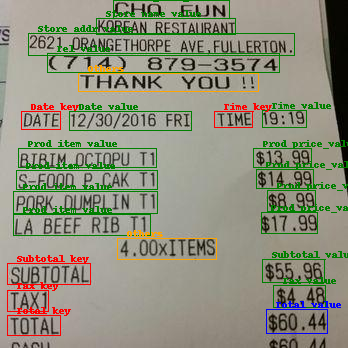

In [37]:
from PIL import ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

font = ImageFont.load_default()

def iob_to_label(label):
    #label = label[2:]
    if not label:
      return 'other'
    return label

label2color = {
    "Date_key": 'red',
    "Date_value": 'green',
    "Ignore": 'orange',
    "Others": 'orange',
    "Prod_item_key": 'red',
    "Prod_item_value": 'green',
    "Prod_price_key": 'red',
    "Prod_price_value": 'green',
    "Prod_quantity_key": 'red',
    "Prod_quantity_value": 'green',
    "Store_addr_key": 'red',
    "Store_addr_value": 'green',
    "Store_name_key": 'red',
    "Store_name_value": 'green',
    "Subtotal_key": 'red',
    "Subtotal_value": 'green',
    "Tax_key": 'red',
    "Tax_value": 'green',
    "Tel_key": 'red',
    "Tel_value": 'green',
    "Time_key": 'red',
    "Time_value": 'green',
    "Tips_key": 'red',
    "Tips_value": 'green',
    "Total_key": 'red',
    "Total_value": 'blue'
  }

for prediction, box in zip(true_predictions, true_boxes):
    predicted_label = iob_to_label(prediction)
    draw.rectangle(box, outline=label2color[predicted_label])
    draw.text((box[0] + 10, box[1] - 10), text=predicted_label, fill=label2color[predicted_label], font=font)

image

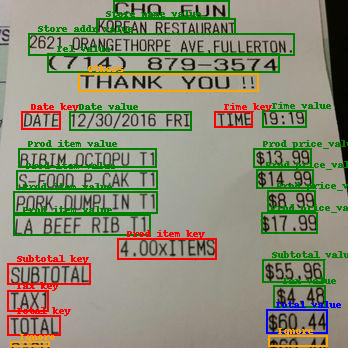

In [38]:
image = Image.open(example["image_path"]).convert("RGB")

draw = ImageDraw.Draw(image)

for word, box, label in zip(example['words'], example['bboxes'], example['ner_tags']):
  actual_label = iob_to_label(id2label[label])
  box = unnormalize_box(box, width, height)
  draw.rectangle(box, outline=label2color[actual_label], width=2)
  draw.text((box[0] + 10, box[1] - 10), actual_label, fill=label2color[actual_label], font=font)

image

# Inference using Gradio

In [45]:
import os

import gradio as gr
import numpy as np
from transformers import AutoModelForTokenClassification
from datasets.features import ClassLabel
from transformers import AutoProcessor
from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D
import torch
from datasets import load_metric
from transformers import LayoutLMv3ForTokenClassification
from transformers.data.data_collator import default_data_collator


from transformers import AutoModelForTokenClassification
from datasets import load_dataset
from PIL import Image, ImageDraw, ImageFont


processor = AutoProcessor.from_pretrained("Theivaprakasham/layoutlmv3-finetuned-wildreceipt", apply_ocr=True)
model = AutoModelForTokenClassification.from_pretrained("Theivaprakasham/layoutlmv3-finetuned-wildreceipt")



# load image example
dataset = load_dataset("Theivaprakasham/wildreceipt", split="test")
Image.open(dataset[20]["image_path"]).convert("RGB").save("example1.png")
Image.open(dataset[13]["image_path"]).convert("RGB").save("example2.png")
Image.open(dataset[15]["image_path"]).convert("RGB").save("example3.png")
# define id2label, label2color
labels = dataset.features['ner_tags'].feature.names
id2label = {v: k for v, k in enumerate(labels)}
label2color = {
    "Date_key": 'red',
    "Date_value": 'green',
    "Ignore": 'orange',
    "Others": 'orange',
    "Prod_item_key": 'red',
    "Prod_item_value": 'green',
    "Prod_price_key": 'red',
    "Prod_price_value": 'green',
    "Prod_quantity_key": 'red',
    "Prod_quantity_value": 'green',
    "Store_addr_key": 'red',
    "Store_addr_value": 'green',
    "Store_name_key": 'red',
    "Store_name_value": 'green',
    "Subtotal_key": 'red',
    "Subtotal_value": 'green',
    "Tax_key": 'red',
    "Tax_value": 'green',
    "Tel_key": 'red',
    "Tel_value": 'green',
    "Time_key": 'red',
    "Time_value": 'green',
    "Tips_key": 'red',
    "Tips_value": 'green',
    "Total_key": 'red',
    "Total_value": 'blue'
  }

def unnormalize_box(bbox, width, height):
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]


def iob_to_label(label):
    return label



def process_image(image):

    print(type(image))
    width, height = image.size

    # encode
    encoding = processor(image, truncation=True, return_offsets_mapping=True, return_tensors="pt")
    offset_mapping = encoding.pop('offset_mapping')

    # forward pass
    outputs = model(**encoding)

    # get predictions
    predictions = outputs.logits.argmax(-1).squeeze().tolist()
    token_boxes = encoding.bbox.squeeze().tolist()

    # only keep non-subword predictions
    is_subword = np.array(offset_mapping.squeeze().tolist())[:,0] != 0
    true_predictions = [id2label[pred] for idx, pred in enumerate(predictions) if not is_subword[idx]]
    true_boxes = [unnormalize_box(box, width, height) for idx, box in enumerate(token_boxes) if not is_subword[idx]]

    # draw predictions over the image
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()
    for prediction, box in zip(true_predictions, true_boxes):
        predicted_label = iob_to_label(prediction)
        draw.rectangle(box, outline=label2color[predicted_label])
        draw.text((box[0]+10, box[1]-10), text=predicted_label, fill=label2color[predicted_label], font=font)
    
    return image


title = "Restaurant/ Hotel Bill information extraction using LayoutLMv3 model"
description = "Restaurant/ Hotel Bill information extraction - We use Microsoft's LayoutLMv3 trained on WildReceipt Dataset to predict the Store_name_value, Store_name_key, Store_addr_value, Store_addr_key, Tel_value, Tel_key, Date_value, Date_key, Time_value, Time_key, Prod_item_value, Prod_item_key, Prod_quantity_value, Prod_quantity_key, Prod_price_value, Prod_price_key, Subtotal_value, Subtotal_key, Tax_value, Tax_key, Tips_value, Tips_key, Total_value, Total_key. To use it, simply upload an image or use the example image below. Results will show up in a few seconds."

article="<b>References</b><br>[1] Y. Xu et al., “LayoutLMv3: Pre-training for Document AI with Unified Text and Image Masking.” 2022. <a href='https://arxiv.org/abs/2204.08387'>Paper Link</a><br>[2]  <a href='https://github.com/NielsRogge/Transformers-Tutorials/tree/master/LayoutLMv3'>LayoutLMv3 training and inference</a><br>[3] Hongbin Sun, Zhanghui Kuang, Xiaoyu Yue, Chenhao Lin, and Wayne Zhang. 2021. Spatial Dual-Modality Graph Reasoning for Key Information Extraction. arXiv. DOI:https://doi.org/10.48550/ARXIV.2103.14470  <a href='https://doi.org/10.48550/ARXIV.2103.14470'>Paper Link</a>" 

examples =[['example1.png'],['example2.png'],['example3.png']]

css = """.output_image, .input_image {height: 600px !important}"""

iface = gr.Interface(fn=process_image, 
                     inputs=gr.inputs.Image(type="pil"), 
                     outputs=gr.outputs.Image(type="pil", label="annotated image"),
                     title=title,
                     description=description,
                     article=article,
                     examples=examples,
                     css=css,
                     analytics_enabled = True, enable_queue=True)

iface.launch(inline=False, share=True, debug=True)

loading feature extractor configuration file https://huggingface.co/Theivaprakasham/layoutlmv3-finetuned-wildreceipt/resolve/main/preprocessor_config.json from cache at /root/.cache/huggingface/transformers/b4587c8e7eeea13769505fac018af7b81f02e3b00b7aaecc035faddceedc1b6b.bc8c887087325e20c38441398b85efcfe98e89be3d3306d2a2d981de57445a51
loading feature extractor configuration file https://huggingface.co/Theivaprakasham/layoutlmv3-finetuned-wildreceipt/resolve/main/preprocessor_config.json from cache at /root/.cache/huggingface/transformers/b4587c8e7eeea13769505fac018af7b81f02e3b00b7aaecc035faddceedc1b6b.bc8c887087325e20c38441398b85efcfe98e89be3d3306d2a2d981de57445a51
Feature extractor LayoutLMv3FeatureExtractor {
  "apply_ocr": true,
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "LayoutLMv3FeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "ocr_lang": null,
  "processor_class": "LayoutLMv3Proces

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://55708.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
<class 'PIL.Image.Image'>


/usr/local/lib/python3.7/dist-packages/transformers/modeling_utils.py:811: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is deprecated and will be removed in v5 of Transformers.", FutureWarning


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7f8c7fa94350>,
 'http://127.0.0.1:7860/',
 'https://55708.gradio.app')